In [ ]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import pandas as pd
import itertools
import numpy as np
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt
# import matplotlib
from scipy.interpolate import splrep, splev
import pylab as pylt
import matplotlib
from google.colab import files
import matplotlib.ticker as ticker

# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Get the path to the CSV file
csv_file_path = '/content/drive/My Drive/python data upload/th/penta/data2idvd_exp.csv'

# Read the CSV file into a Pandas DataFrame
dexp = pd.read_csv(csv_file_path)
dexp =dexp.loc[::-1, :] # reverse row order
dexp.reset_index(inplace = True, drop = True) # reset index

csv_file_path2 = '/content/drive/My Drive/python data upload/th/penta/data2idvd_sim.csv'
dsim= pd.read_csv(csv_file_path2)
# dsim =dsim.loc[::-1, :] # reverse row order
dsim.reset_index(inplace = True, drop = True) # reset index
# print(dexp,dsim)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# print(dexp,dsim)


In [ ]:

from scipy.interpolate import splrep, splev

dsim = dsim.sort_values('x')
dexp = dexp.sort_values('x')

def interpolate_dataframe(xint, data):
    data_interp = pd.DataFrame(index=range(len(xint)))  # Create an empty dataframe for interpolated values
    for column in data.columns:
        x = data['x'].values
        y = data[column].values
        # Spline interpolation
        spl = splrep(x, y)
        yint = splev(xint, spl)

        # Add interpolated column to the dataframe
        data_interp[column] = yint

    return data_interp


xint = np.linspace(0, -10, 50)  # Adjust the desired range of interpolation

# Interpolate dexp dataframe
dexpn = interpolate_dataframe(xint, dexp)


# Interpolate dsim dataframe
dsimn = interpolate_dataframe(xint, dsim)



In [ ]:
dexp=pd.DataFrame(dexpn)
dsim=pd.DataFrame(dsimn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

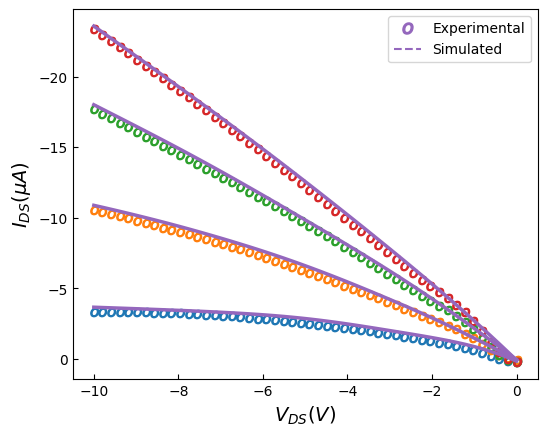

In [ ]:

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
# fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')  #title
# ax.set_title('axes title')

ax.set_xlabel('${V}_{{DS}}(V)$',fontsize=14)
ax.set_ylabel('$I_{D S}(µA)$',fontsize=14,)

ax.tick_params(direction='in')
ax.tick_params(which='minor',direction='in' )


exp_columns = dexp.columns[1:]
sim_columns = dsim.columns[1:]

# Plotting experimental data columns as scatter symbols with different colors
for column in exp_columns:
    ax.scatter(dexp['x'], dexp[column], marker='$O$', label=column)

sim_color = plt.cm.tab10(len(exp_columns))  # Choose a color for simulated data
for column in sim_columns:
    ax.plot(dsim['x'], dsim[column], label=column, color=sim_color, linewidth=2.5)

ax.invert_yaxis()

# legend_____
scatter_legend = plt.Line2D([], [], marker='$o$', color=sim_color, linestyle='None',
                           markersize=8, label='Experimental')
line_legend = plt.Line2D([], [], color=sim_color, linestyle='--', label='Simulation')
plt.legend(handles=[scatter_legend, line_legend])

# annotation
anot0 =ax.annotate('${V}_{{GS}}$ = -90 V', xy=(-80, -0.45), xytext=(-67, -0.47),arrowprops=dict(facecolor='#3FC062', shrink=0.05)) # arrow
anot0.set_fontsize(14)
anot1 =ax.annotate('${V}_{{GS}}$ = -90 V', xy=(-28, -0.28), xytext=(-28, -0.4),arrowprops=dict(facecolor='#5C80D0', shrink=0.05)) # arrow
anot1.set_fontsize(14)
anot2 =ax.annotate(' with \n -10 v step', xy=(-22, -0.25), xytext=(-25, -0.31)) # with
anot2.set_fontsize(14)
anot3 =ax.annotate('-30 V', xy=(-28, -0.0001), xytext=(-28, -0.24)) # arrow
anot3.set_fontsize(14)

fig.savefig('IDVD data2 penta .jpg', dpi=300)
files.download('IDVD data2 penta .jpg')